In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os

import pandas as pd
from biomarker.data_collection import *
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_collection


In [2]:
NUM_TEST = 50
SEED = 1

In [3]:
excel = parse_master_file()

[3, 9]


In [4]:
L = get_filename_list(excel['Associated data'])

In [5]:
x1 = create_x1_matrix(L)

In [6]:
x4 = create_x4_matrix(L)

In [7]:
x5 = create_x5_matrix(L)

In [8]:
x6 = create_x6_matrix(L)

In [9]:
x7 = create_x7_matrix(L)

In [10]:
y = excel['Output: logK'].values
y_buck = excel['Output: logKbucket'].values
y[-1] = 1
cutoffs = [3]
x10_x17 = excel.iloc[:, 3:-2]

In [11]:
type(y_buck)
bucks = np.unique(y_buck)
bucks

array([0, 1, 2])

In [12]:
y_buck.shape

(191,)

In [13]:
# y_buck

In [14]:
test_idxs = np.random.randint(0,len(y),NUM_TEST)
train_idxs = np.ones(y.shape,dtype=bool)
train_idxs[test_idxs] = False

In [15]:
y_train = y[train_idxs]
y_test = y[test_idxs]
##how do I put in 901?
y_train_buck = y_buck[train_idxs]
y_test_buck = y_buck[test_idxs]

In [16]:
np.unique(y_train_buck)

array([0, 1, 2])

In [17]:
print(y_test)
y_test_buck
for fl in range(len(y_test)):
    print(y_test[fl], "compare", y_test_buck[fl])

[ 2.6   3.75  2.47  8.51  5.36  3.44  5.22  6.72  7.04  6.66  9.71  4.74
  6.25  4.09  5.16  4.9   2.6  10.32  5.51  3.92  2.64  4.54  4.54  6.74
  4.39  4.39  4.38  6.83  5.93  6.71  5.52  7.95  3.95  8.31  6.35 12.23
  4.95  5.93  6.17 11.63  8.31  7.16  4.9   2.43 12.23  5.92  4.95  6.82
  5.93  7.04]
2.6 compare 0
3.75 compare 1
2.47 compare 0
8.51 compare 1
5.36 compare 1
3.44 compare 1
5.22 compare 1
6.72 compare 1
7.04 compare 1
6.66 compare 1
9.71 compare 2
4.74 compare 1
6.25 compare 1
4.09 compare 1
5.16 compare 1
4.9 compare 1
2.6 compare 0
10.32 compare 2
5.51 compare 1
3.92 compare 1
2.64 compare 0
4.54 compare 1
4.54 compare 1
6.74 compare 1
4.39 compare 1
4.39 compare 1
4.38 compare 1
6.83 compare 1
5.93 compare 1
6.71 compare 1
5.52 compare 1
7.95 compare 1
3.95 compare 1
8.31 compare 1
6.35 compare 1
12.23 compare 2
4.95 compare 1
5.93 compare 1
6.17 compare 1
11.63 compare 2
8.31 compare 1
7.16 compare 1
4.9 compare 1
2.43 compare 0
12.23 compare 2
5.92 compare 1
4.95

In [18]:
master, master_names = prepare_master(x10_x17)

In [19]:
master.shape

(191, 24)

In [20]:
master_names

['A',
 'B',
 'C',
 'D',
 'X11: Temperature (K)',
 'X12: [Salt*Valency]',
 0.0,
 1.0,
 2.0,
 3.0,
 'X14: [Buffer] (mM)',
 'X15: pH',
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 'CI_1',
 'CI_2',
 'CI_4',
 'CI_5',
 'CI_7',
 'CI_8',
 'N']

In [21]:
def check_drug(num, reduct_func_lists, pred_func):
    x1_model.pred

In [39]:
def reduction_then_regression(x1, x4, x5, x6, x7, master, train_idxs,test_idxs,reduct_func, pred,y_reduct,y_out):
    y_train = y_reduct[train_idxs]
    y_test = y_reduct[test_idxs]
    y_check = y_out[test_idxs]
    x1_approx_train, x1_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    print(x1_approx_train)
    ####what is this outputting???????
    x4_approx_train, x4_model = reduct_func(x4[train_idxs], y_reduct[train_idxs])
    x5_approx_train, x5_model = reduct_func(x5[train_idxs], y_reduct[train_idxs])
    x6_approx_train, x6_model = reduct_func(x6[train_idxs], y_reduct[train_idxs])
    x7_approx_train, x7_model = reduct_func(x7[train_idxs], y_reduct[train_idxs])
    master_train = master[train_idxs]
    master_test = master[test_idxs]                            
    x1_approx_test = x1_model.predict(x1[test_idxs])
    x4_approx_test = x4_model.predict(x4[test_idxs])
    x5_approx_test = x5_model.predict(x5[test_idxs])
    x6_approx_test = x6_model.predict(x6[test_idxs])
    x7_approx_test = x7_model.predict(x7[test_idxs])
#     print(x1_approx_test)                                       
    all_xs_train = np.column_stack((x1_approx_train, x4_approx_train, x5_approx_train, x6_approx_train, x7_approx_train, master_train))                                        
    all_xs_test = np.column_stack((x1_approx_test, x4_approx_test, x5_approx_test, x6_approx_test, x7_approx_test,master_test))
    pred.fit(all_xs_train, y_out[train_idxs])
    predictions = pred.predict(all_xs_test)
    error = predictions - y_check
#     print(y_check)
    print(y_check, "check")
    print(predictions,"guess")
                                            
#         # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print("Mean squared error: %.2f"
#           % mean_squared_error(y_check, predictions))
#     # Explained variance score: 1 is perfect prediction
#     print('Variance score: %.2f' % r2_score(y_check, predictions))


    pca = PCA(n_components=2)
    all_xs = np.column_stack((x1, x4, x5, x6, x7, master))
    pca.fit(all_xs)
    xs_reduced = pca.transform(all_xs)

    # # Plot outputs
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs_reduced[:,0], xs_reduced[:,1], y)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('logK')
    return predictions
                                        
                                            


[ 4.63        4.8         4.9         5.55        6.315       6.315
  6.92        5.26538462  5.26538462  5.26538462  5.26538462  5.26538462
  5.26538462  5.26538462  5.26538462  5.26538462  5.26538462  5.26538462
  5.26538462  5.26538462  7.26        7.355       7.355       7.58
  7.95        8.95        9.255       9.255      12.62       12.29
  4.88        5.48        6.86666667  6.86666667  6.86666667  7.17666667
  7.17666667  7.17666667  6.71333333  6.71333333  6.71333333  6.46
  5.745       5.745       5.33        5.33        4.24        4.83
  7.04        5.08        4.95        2.53        3.84       13.47
 13.47       11.125      14.54       14.54        9.94        9.78
 14.3        10.36       14.88       14.          5.08        6.
  8.39        6.34        5.11        4.53        6.08        6.63
  7.14        7.08        4.08333333  4.08333333  4.08333333  7.1
  7.13        7.08        7.23        4.3         4.3         5.52
  5.55        5.76        5.81        6.25    

<IPython.core.display.Javascript object>


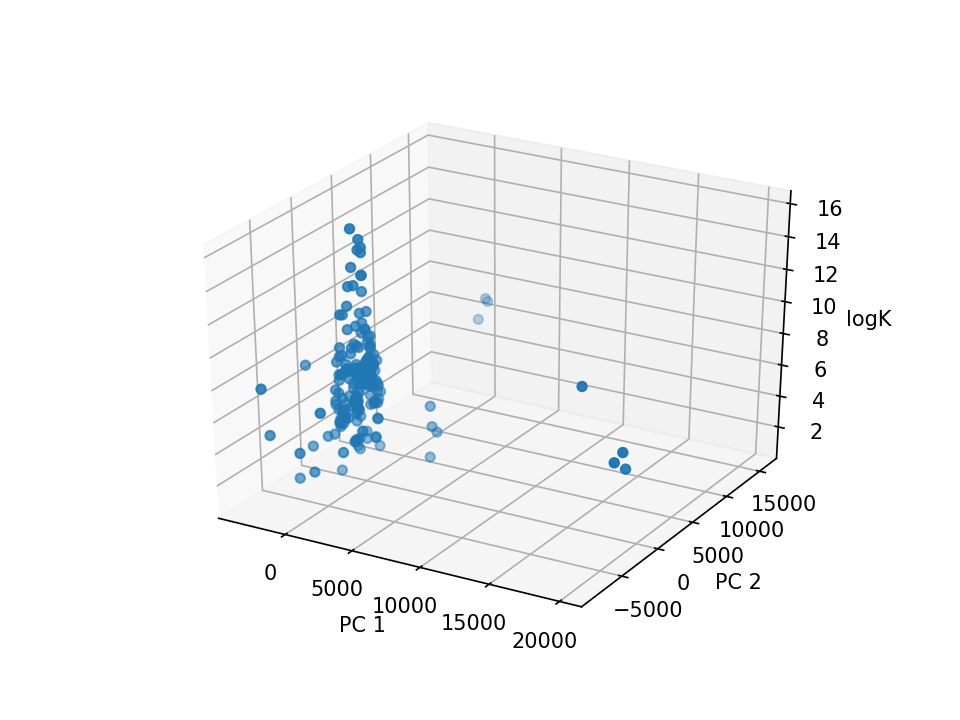

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 1, 1, 0])

In [40]:
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,linear_regression_approx,  linear_model.LinearRegression(), y, y)
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,regression_tree_approx,  linear_model.LinearRegression(), y, y)
reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,linear_regression_approx, SVC(kernel = "linear", max_iter = 10000, C = .1, ), y, y_buck)
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,decision_tree_approx,  LinearSVC(fit_intercept=True, max_iter = 100000), y, y_buck)


In [25]:
# YOOOO
## shouldn't we just be using first index for vals?
# x1_approx_train, x1_lin = linear_regression_approx(x1[train_idxs], y_train)
# x4_approx_train, x4_lin = linear_regression_approx(x4[train_idxs], y_train)
# x5_approx_train, x5_lin = linear_regression_approx(x5[train_idxs], y_train)
# x6_approx_train, x6_lin = linear_regression_approx(x6[train_idxs], y_train)
# x7_approx_train, x7_lin = linear_regression_approx(x7[train_idxs], y_train)
# x1_approx_train_buck, x1_lin_buck = linear_classification_approx(x1[train_idxs], y_buck_train)
# x4_approx_train_buck, x4_lin_buck = linear_classification_approx(x4[train_idxs], y_buck_train)
# x5_approx_train_buck, x5_lin_buck = linear_classification_approx(x5[train_idxs], y_buck_train)
# x6_approx_train_buck, x6_lin_buck = linear_classification_approx(x6[train_idxs], y_buck_train)
# x7_approx_train_buck, x7_lin_buck = linear_classification_approx(x7[train_idxs], y_buck_train)



x1_approx_train, x1_tree = regression_tree_approx(x1[train_idxs], y_train)
x4_approx_train, x4_tree = regression_tree_approx(x4[train_idxs], y_train)
x5_approx_train, x5_tree = regression_tree_approx(x5[train_idxs], y_train)
x6_approx_train, x6_tree = regression_tree_approx(x6[train_idxs], y_train)
x7_approx_train, x7_tree = regression_tree_approx(x7[train_idxs], y_train)

x1_approx_train_buck, x1_lin_buck = decision_tree_approx(x1[train_idxs], y_train_buck)
x4_approx_train_buck, x4_lin_buck = decision_tree_approx(x4[train_idxs], y_train_buck)
x5_approx_train_buck, x5_lin_buck = decision_tree_approx(x5[train_idxs], y_train_buck)
x6_approx_train_buck, x6_lin_buck = decision_tree_approx(x6[train_idxs], y_train_buck)
x7_approx_train_buck, x7_lin_buck = decision_tree_approx(x7[train_idxs], y_train_buck)
# x1_approx_train = regression_tree_approx(x1[train_idxs], y_train)
# x4_approx_train = regression_tree_approx(x4[train_idxs], y_train)
# x5_approx_train = regression_tree_approx(x5[train_idxs], y_train)
# x6_approx_train = regression_tree_approx(x6[train_idxs], y_train)
# x7_approx_train = regression_tree_approx(x7[train_idxs], y_train)

In [26]:
master_train = master[train_idxs]
master_test = master[test_idxs]

In [27]:
# print(master_train)
print(x7_approx_train)
print(len(x4_approx_train))
print(len(x6_approx_train))
print(len(x7_approx_train))

[ 6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
 12.04607143 12.04607143  6.07284483  6.07284483 12.04607143  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483 12.04607143
 12.04607143 12.04607143 12.04607143 12.04607143  6.07284483 12.04607143
 12.04607143 12.04607143 12.04607143 12.04607143  6.07284483  6.07284483
  6.07284483  3.69823529  3.69823529  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483  6.07284483
  6.07284483  6.07284483  6.07284483  6.07284483  3

In [28]:
# regr = linear_model.LinearRegression()
regr = LinearSVC(fit_intercept=True, max_iter = 100000)
all_xs_train = np.column_stack((x1_approx_train, x4_approx_train, x5_approx_train, x6_approx_train, x7_approx_train, master_train))
# all_xs_train = np.column_stack((x1_approx_train_buck, x4_approx_train_buck, x5_approx_train_buck, x6_approx_train_buck, x7_approx_train_buck, master_train_buck))
# regr.fit(all_xs_train, y_train)
regr.fit(all_xs_train, y_train_buck)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
x1_approx_test = x1_tree.predict(x1[test_idxs])
x4_approx_test = x4_tree.predict(x4[test_idxs])
x5_approx_test = x5_tree.predict(x5[test_idxs])
x6_approx_test = x6_tree.predict(x6[test_idxs])
x7_approx_test = x7_tree.predict(x7[test_idxs])

x1_approx_buck_test = x1_lin_buck.predict(x1[test_idxs])
x4_approx_buck_test = x4_lin_buck.predict(x4[test_idxs])
x5_approx_buck_test = x5_lin_buck.predict(x5[test_idxs])
x6_approx_buck_test = x6_lin_buck.predict(x6[test_idxs])
x7_approx_buck_test = x7_lin_buck.predict(x7[test_idxs])


# x1_approx_test = regression_tree_approx(x1[test_idxs], y_test)[0]
# x4_approx_test = regression_tree_approx(x4[test_idxs], y_test)[0]
# x5_approx_test = regression_tree_approx(x5[test_idxs], y_test)[0]
# x6_approx_test = regression_tree_approx(x6[test_idxs], y_test)[0]
# x7_approx_test = regression_tree_approx(x7[test_idxs], y_test)[0]
# x1_approx_test = x1_tree.predict(x1[test_idxs])
# x4_approx_test = x4_tree.predict(x4[test_idxs])
# x5_approx_test = x5_tree.predict(x5[test_idxs])
# x6_approx_test = x6_tree.predict(x6[test_idxs])
# x7_approx_test = x7_tree.predict(x7[test_idxs])

In [31]:
all_xs_test = np.column_stack((x1_approx_buck_test, x4_approx_buck_test, x5_approx_buck_test, x6_approx_buck_test, x7_approx_buck_test,master_test))

In [32]:
predictions = regr.predict(all_xs_test)

In [33]:
# predictions - y_test
predictions - y_test_buck

array([ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,
       -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0])

In [34]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Coefficients: 
 [[ 4.46560784e-01  4.46560784e-01 -2.58014435e-01 -4.19888681e-01
  -2.54552477e-01 -2.08513594e-01  3.40759572e-01 -9.03755759e-02
   3.42378017e-02 -1.08290558e-02 -1.06537657e-01  8.67619703e-02
   0.00000000e+00 -1.06537657e-02 -1.49077799e-18  1.45091514e-02
   1.91421292e-01  4.18353309e-01 -8.18304578e-02 -2.60414647e-01
   3.46944695e-18 -1.62630326e-19 -1.04083409e-17 -3.42245105e-01
  -3.15719673e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.18353309e-01]
 [-1.15967810e-01 -1.15967810e-01 -4.08918484e-02 -9.30832398e-02
   3.86286800e-02  1.52594187e-01 -3.00912992e-01  1.07471577e-01
   5.11461389e-02  6.82319169e-03  9.43844850e-02  8.60462908e-04
   4.40457133e-20  9.43844850e-03 -3.17129135e-18 -6.92720068e-03
  -3.46734370e-02 -1.92949693e-01  2.25075157e-01 -1.36090088e-01
  -2.16840434e-19  1.14263535e-01  1.27421493e-01  2.00687871e-01
  -1.48785159e-01  1.20656492e-02  0.00000000e+00  1.18587513e-02
  -1.92949693e-01]
 [ 8.38895792e-02  8.3

<IPython.core.display.Javascript object>


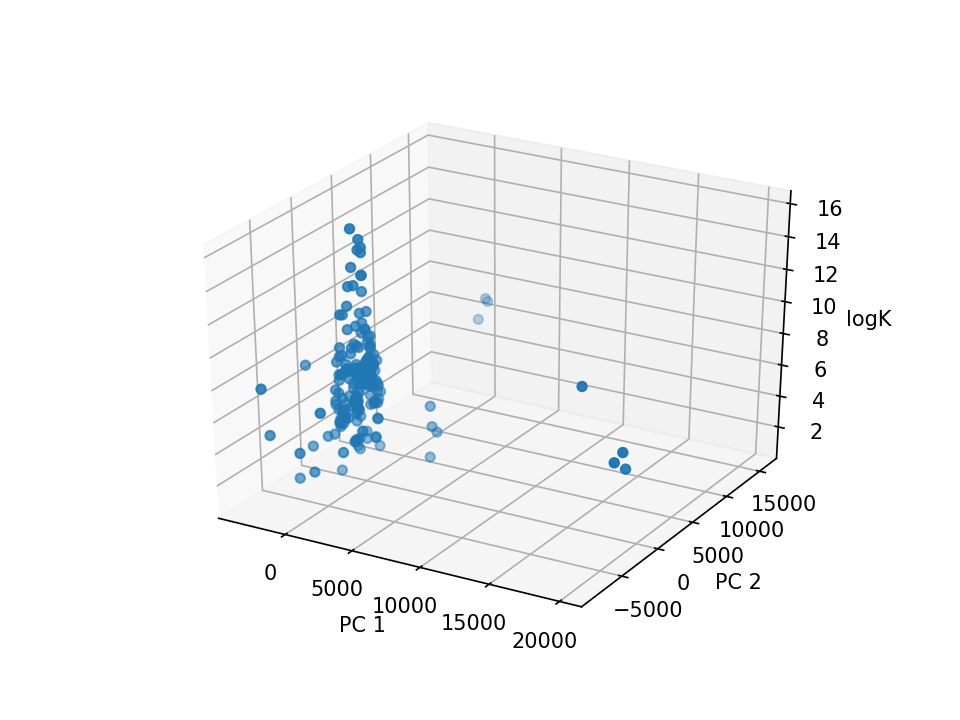

Text(0.5,0,'logK')

In [35]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))


pca = PCA(n_components=2)
all_xs = np.column_stack((x1, x4, x5, x6, x7, master))
pca.fit(all_xs)
xs_reduced = pca.transform(all_xs)

# # Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs_reduced[:,0], xs_reduced[:,1], y)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('logK')
